In [0]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np


In [0]:
# instantiating a small convnet
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [0]:
# adding a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)              

In [0]:
# load cifar-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images.shape
test_images.shape


(10000, 32, 32, 3)

In [0]:
#num_classes = 10
from keras.utils import to_categorical

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
50000/50000 [==============================] - 83s 2ms/step - loss: 1.5425 - acc: 0.4465
Epoch 2/5
50000/50000 [==============================] - 83s 2ms/step - loss: 1.1156 - acc: 0.6095
Epoch 3/5
50000/50000 [==============================] - 83s 2ms/step - loss: 0.9232 - acc: 0.6783
Epoch 4/5
50000/50000 [==============================] - 83s 2ms/step - loss: 0.7831 - acc: 0.7281
Epoch 5/5
50000/50000 [==============================] - 83s 2ms/step - loss: 0.6729 - acc: 0.7675


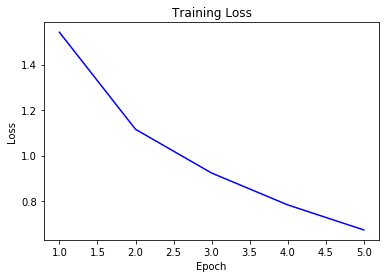

In [0]:
import matplotlib.pyplot as plt

# plot for training loss
epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, history.history['loss'], 'b', label='Training Loss')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

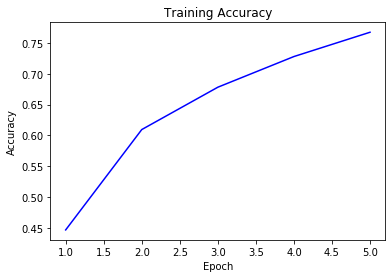

In [0]:
# plot for training accuracy
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'], 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [0]:
# evaluate model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

10000/10000 [==============================] - 5s 487us/step
0.648
